<a href="https://colab.research.google.com/github/MFaiqKhan/classical_MachineLearning/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Random Forest**  consists of multiple decisions trees, one of the ensemble learning called bagging, where multiple models are fitted to the same data. 
**Learning Resources:**
- [Decision Trees explained entropy-information gain](https://medium.com/towards-data-science/decision-trees-explained-entropy-information-gain-gini-index-ccp-pruning-4d78070db36c)
- [Random Forest](https://www.section.io/engineering-education/introduction-to-random-forest-in-machine-learning/)
- [The Intuition behind Random Forest! Explained with example.](https://www.kaggle.com/general/191828)

Divide the main dataset into multiple bunch of random samples and build decision tree for each sample.
We got multiple decision trees known as random forest basically. 
This process is known as bootstrapping .
Then we predict what we want from each of decision tree and take the majority vote it is called aggregation as we are getting the aggregate . 
whole process is called bagging or bootstrap aggregation.
- Majority Vote in Classification 
- Mean in Regression Problems

Random Forest is a type of ensemble learning method that builds multiple decision trees using different subsets of the training data and/or features. Two commonly used techniques in Random Forest are row (or instance) sampling and feature sampling, which are explained below:

1. *Row (instance) sampling*: In row sampling, a random subset of the training data (i.e., rows or instances) is selected for each decision tree in the forest. This subset is typically chosen to be smaller than the original dataset, which creates multiple trees that are trained on different subsets of the data. This helps to reduce overfitting and improve the generalization performance of the model.
 
2. *Feature sampling*: In feature sampling, a random subset of the features (i.e., columns) is selected for each decision tree in the forest. This subset is typically chosen to be smaller than the total number of features in the dataset, which creates multiple trees that are trained on different subsets of the features. This helps to reduce the correlation between the trees and improve the diversity of the model.

Both row and feature sampling are performed independently for each decision tree in the Random Forest. This means that each tree in the forest has a different subset of training data and/or features, which helps to reduce overfitting and improve the robustness of the model.

Overall, row and feature sampling are powerful techniques in Random Forest that can help to improve the generalization performance of the model by reducing overfitting and improving the diversity of the decision trees in the forest.



---



### *Using sklearn Digits dataset for classification using random forest*

---



In [31]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

In [32]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [33]:
digits.images[1]

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

<Figure size 640x480 with 0 Axes>

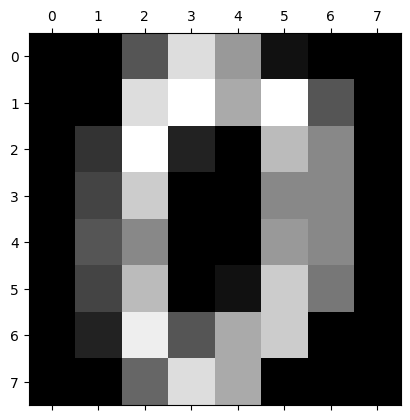

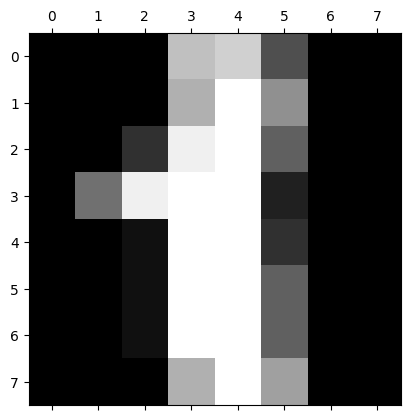

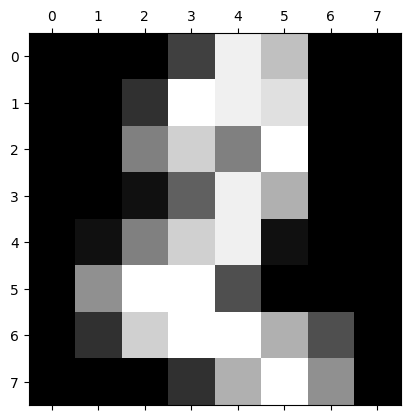

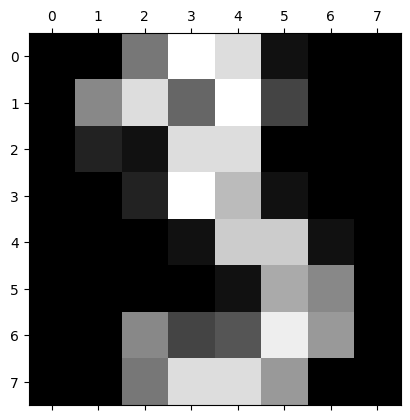

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt 
plt.gray()
for i in range(4): # 0, 1, 2, 3
  plt.matshow(digits.images[i])


In [35]:
# This attribute contains the feature vectors of the images, 
# which represent the intensity of each pixel in the image. Each image is represented as a 1D array of length 64 (8x8 pixels)
digits.data[1]

array([ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
       15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
        0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
       16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.])

In [36]:
df = pd.DataFrame(digits.data) # each image have 64 samples and they map to target 
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In the context of machine learning, truth typically refers to the actual, real-world values of the target variable that the model is trying to predict. For example, if we are building a model to predict the price of a house based on its features, such as the number of bedrooms, bathrooms, and square footage, the truth would be the actual price of the house.

The goal of the machine learning model is to learn patterns in the training data that allow it to make accurate predictions of the truth for new, unseen data. The accuracy of the model's predictions can be evaluated using metrics such as mean squared error or accuracy, which measure the difference between the predicted values and the true values.

It's important to note that while machine learning models can be very accurate at predicting the truth in some cases, they are not infallible and can make mistakes. Additionally, the truth itself can be subjective or difficult to measure in some cases, leading to challenges in evaluating the performance of machine learning models.

In [37]:
df['target'] = digits.target # target is showing you the truth
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['target'], axis='columns'), digits.target, test_size = 0.2)
# (X = independent variable), (Y = dependent variable e.g: target)

In [39]:
len(X_train), len(X_test)

(1437, 360)

In scikit-learn's implementation of random forest, n_estimators is a hyperparameter that controls the number of decision trees to be included in the random forest.

Random forest is an ensemble learning algorithm that builds a set of decision trees and combines their predictions to make a final prediction. Each decision tree in the random forest is built independently and randomly sampled from the dataset, with a random subset of features considered for each split.

The n_estimators hyperparameter specifies the number of decision trees to be included in the random forest. Increasing the number of trees typically improves the accuracy of the model, but also increases the computational cost and may lead to overfitting if the number is too high.

A common practice is to tune n_estimators using techniques such as grid search or random search to find the optimal value for the specific dataset and problem. Scikit-learn's default value for n_estimators is 100.

In [40]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier() # here the default parameter of n_estimator is 100 
model.fit(X_train,y_train)


RandomForestClassifier()

In [41]:
model.score(X_test,y_test)

0.9777777777777777

In [42]:
y_predicted = model.predict(X_test)

In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted) # ( truth values, predictedvalues )
cm

array([[27,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 30,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 35,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 36,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 36,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 35,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 41,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  0, 46,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  1,  1, 32]])

Text(95.72222222222221, 0.5, 'Truth')

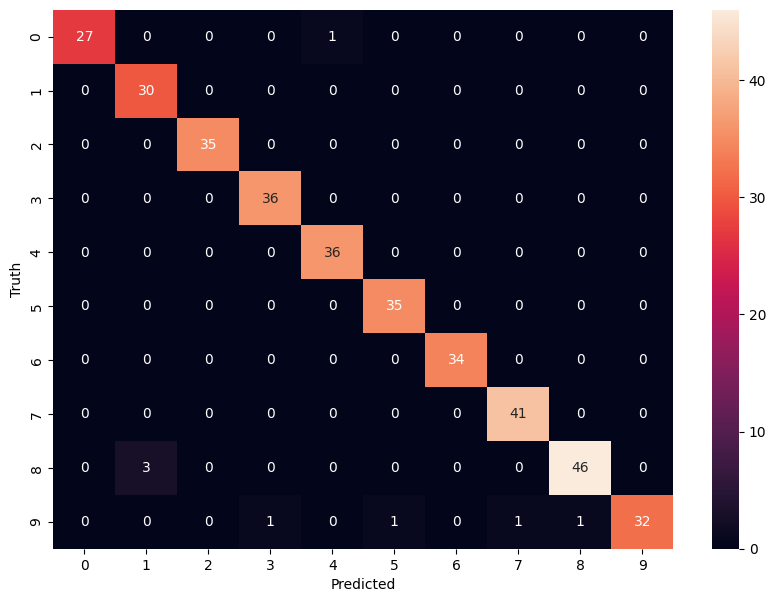

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Confusion matrix visualized through seaborn library shows predicted values on X-axis and truth values on Y-axis.
E.g: For the 'one' Number , Our Model predicts Number 1 as 1 30 times (right) and 3 time predicted 1 as number 8 which was wrong

# Exercise: 
Usae famous iris flower dataset from sklearn.datasets to rpedict flower species using random forest classifier.

In [45]:
import pandas as pd 
from sklearn.datasets import load_iris
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [46]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [47]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['target'],axis='columns'),iris.target,test_size=0.2)

In [49]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [58]:
model.score(X_test,y_test)

0.9666666666666667

In [60]:
model = RandomForestClassifier(n_estimators=1)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9333333333333333